In [78]:
#libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [217]:
train=pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
#Finding Missing Value #heatmap to see where the data is missing
train.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


19.865319865319865
77.10437710437711


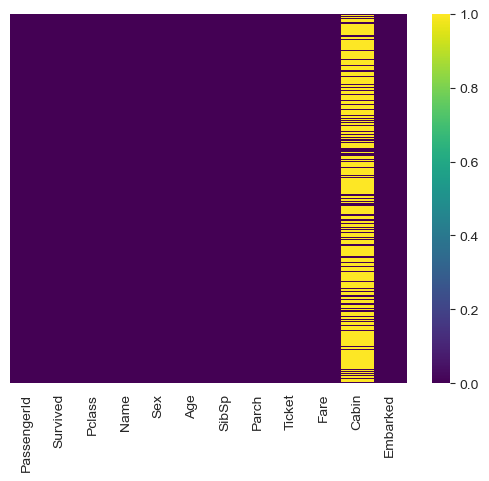

In [231]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis') #cbar='false', cmap='viridis' 
#most of the nan value presendt in age , cabin
#so in below chart 
train[train.Age.isnull()]# to see null value count which is 177

train.Age #891 total rows
print((177/891)*100) # approax 20 percent value are missing in Age
train[train.Cabin.isnull()] #687 
train.Cabin #891
print((687/891)*100)  #approax 77 percent value are missing in Cabin

<AxesSubplot:xlabel='Survived', ylabel='count'>

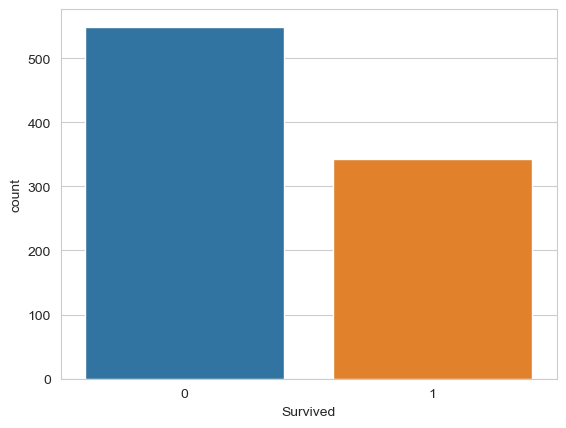

In [225]:
#using counte plot
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)  #to plost x = col_name, data=Data_Frame
#550 not survived and 350 survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

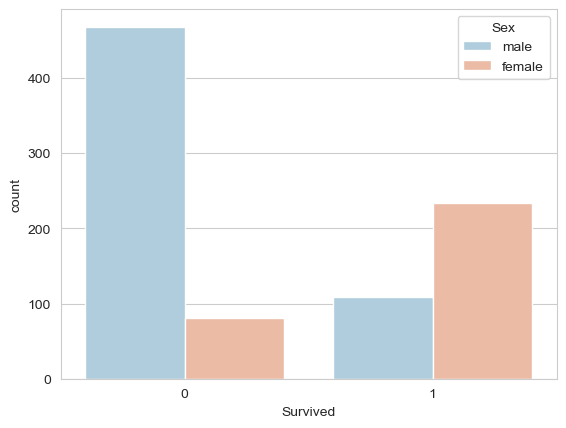

In [226]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

In [227]:
#in this we get a hint of survial and deceased person on Gender based
print(train[(train['Sex']=='male') & (train['Survived']==0)].count().max(),"Male")
print(train[(train['Sex']=='female') & (train['Survived']==0)].count().max(),"Female")

print('Survived')
print(train[(train['Sex']=='male') & (train['Survived']==1)].count().max(),"Male")
print(train[(train['Sex']=='female') & (train['Survived']==1)].count().max(),"Female")



468 Male
81 Female
Survived
109 Male
233 Female


<AxesSubplot:xlabel='Survived', ylabel='count'>

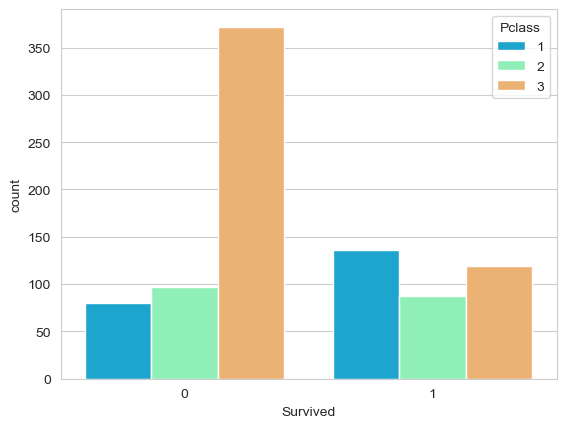

In [228]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Pclass',palette='rainbow')

In [86]:
print(train[train['Pclass']==1].count().max(),"First class") #first class 
print(train[train['Pclass']==2].count().max(),'Second class') #second class
print(train[train['Pclass']==3].count().max(),'Third class') #third class 

print("*"*50)

print("survived not")
k={}
for i in range(1,4):
    k[i]= train[(train['Pclass']==i) & (train['Survived']==0)].count().max()
print(k)
    
print("*"*50)    
print("survived")
c={}
for i in range(1,4):
    c[i]=train[(train['Pclass']==i) & (train['Survived']==1)].count().max()
        
print(c)    

216 First class
184 Second class
491 Third class
**************************************************
survived not
{1: 80, 2: 97, 3: 372}
**************************************************
survived
{1: 136, 2: 87, 3: 119}


/Users/work/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

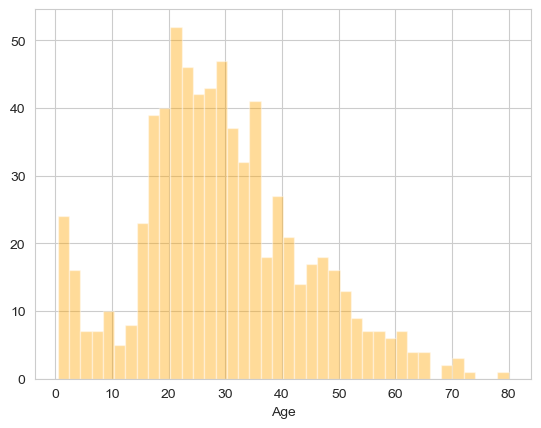

In [87]:
sns.distplot(train['Age'].dropna(),bins=40,kde=False,color='orange')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

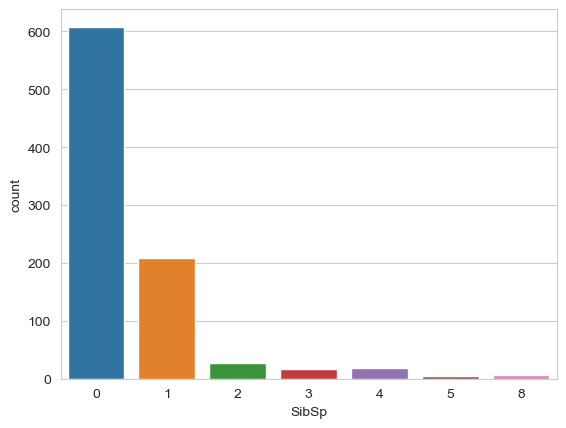

In [88]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

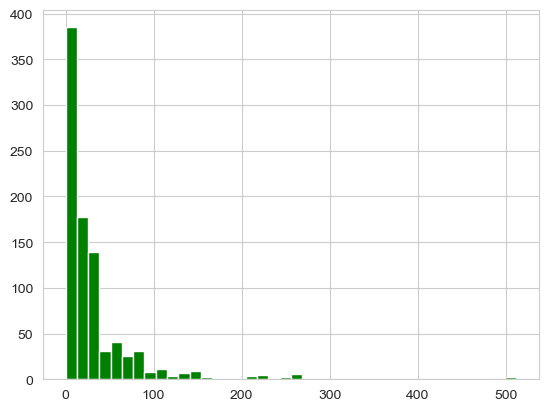

In [89]:
train['Fare'].hist(bins=40,color='green')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

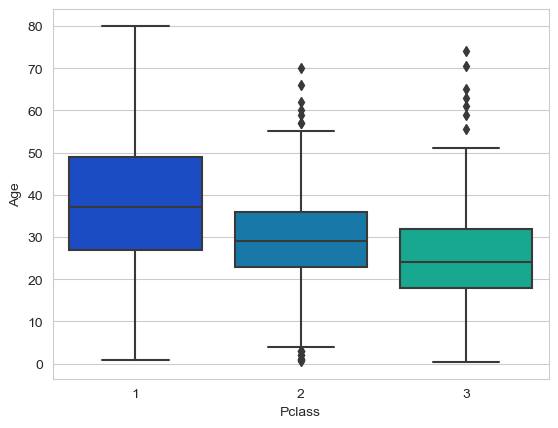

In [90]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [229]:
#change the null value to mean of the data set so that it balance it by taking the medai from three  Passanger classes  
def imute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    



In [230]:
train['Age']=train[['Age','Pclass']].apply(imute_age,axis=1)

/var/folders/hd/n4lkvv294yg1vyg9rk98y8p40000gn/T/ipykernel_65625/2814451909.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
/var/folders/hd/n4lkvv294yg1vyg9rk98y8p40000gn/T/ipykernel_65625/2814451909.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<AxesSubplot:>

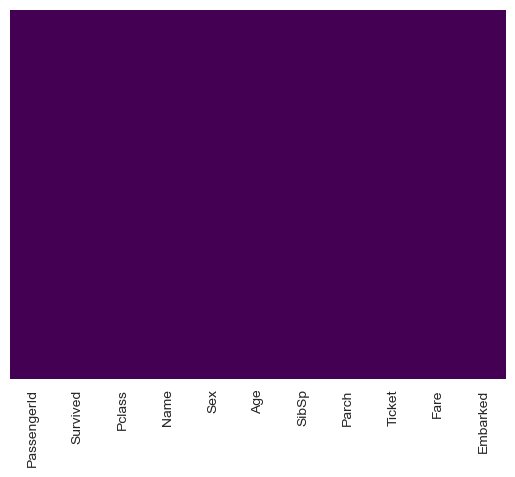

In [234]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False) #cbar='false', cmap='viridis' 

In [233]:
train.drop('Cabin',axis=1,inplace=True)

In [212]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [123]:
#converting categrocial features
train.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [147]:
train.dropna(inplace=True)

In [219]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True).head()

In [222]:
embarked

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [213]:
sex=pd.get_dummies(train['Sex'],drop_first=True).head()

KeyError: 'Sex'

In [218]:
embarked

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [209]:
train.drop(['Name','Ticket'],axis=1,inplace=True)

KeyError: "['Name', 'Ticket'] not found in axis"

In [131]:
train.drop('PassengerId',axis=1,inplace=True)

In [167]:


sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)



In [168]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [153]:
train=pd.concat([train,sex,embarked],axis=1)

In [207]:
train.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,24.0,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
7,8,0,3,2.0,3,1,21.0750
8,9,1,3,27.0,0,2,11.1333
9,10,1,2,14.0,1,0,30.0708


# Training and Predicting

In [ ]:
# train.drop('Survived',axis=1)

In [202]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [201]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare
520,521,1,30.0,0,0,93.5000
510,511,3,29.0,0,0,7.7500
446,447,2,13.0,0,1,19.5000
2,3,3,26.0,0,0,7.9250
691,692,3,4.0,0,1,13.4167
...,...,...,...,...,...,...
575,576,3,19.0,0,0,14.5000
838,839,3,32.0,0,0,56.4958
337,338,1,41.0,0,0,134.5000
523,524,1,44.0,0,1,57.9792


In [180]:
Y_train

807    0
651    1
2      1
690    1
196    0
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 622, dtype: int64

In [33]:
#traing and predicting 

In [175]:
from sklearn.linear_model import LogisticRegression

In [181]:
logmodel=LogisticRegression()
logmodel.fit(X_train[1:],Y_train)


LogisticRegression()

In [182]:
predictions = logmodel.predict(X_test)

In [183]:
from sklearn.metrics import confusion_matrix

In [185]:
accuracy=confusion_matrix(y_test,predictions)

In [187]:
accuracy

array([[153,   1],
       [108,   6]])

In [188]:
from sklearn.metrics import accuracy_score

In [200]:


accuracy=accuracy_score(y_test,predictions)
accuracy

print(accuracy*100)

59.32835820895522


In [190]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [191]:
from sklearn.metrics import classification_report

In [192]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.59      0.99      0.74       154
           1       0.86      0.05      0.10       114

    accuracy                           0.59       268
   macro avg       0.72      0.52      0.42       268
weighted avg       0.70      0.59      0.47       268

